In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan = pd.read_csv('train_loan.csv')

In [4]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Plotting the Variables

In [10]:
def bar_plot(variable):
    """
        input: variable ex: 'Sex'
        output: bar plot & value count
    """
    # get feature
    var = loan[variable]
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    #visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

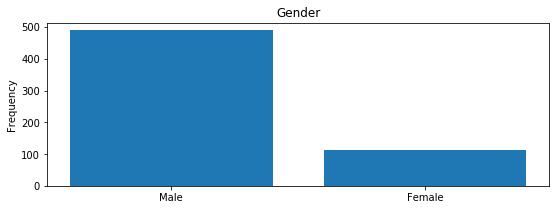

Gender: 
 Male      489
Female    112
Name: Gender, dtype: int64


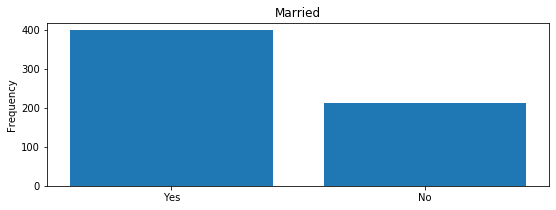

Married: 
 Yes    398
No     213
Name: Married, dtype: int64


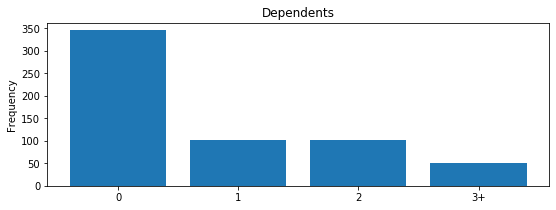

Dependents: 
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


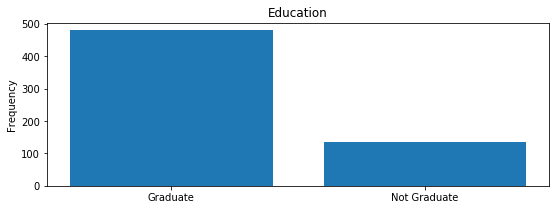

Education: 
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64


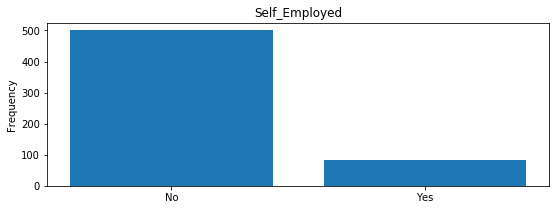

Self_Employed: 
 No     500
Yes     82
Name: Self_Employed, dtype: int64


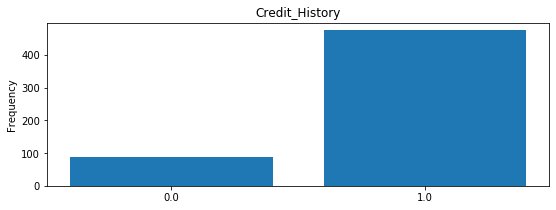

Credit_History: 
 1.0    475
0.0     89
Name: Credit_History, dtype: int64


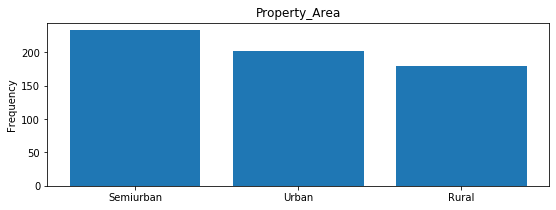

Property_Area: 
 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


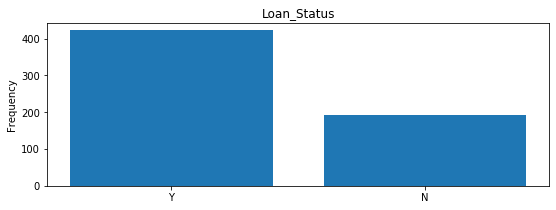

Loan_Status: 
 Y    422
N    192
Name: Loan_Status, dtype: int64


In [12]:
category1 = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
for c in category1:
    bar_plot(c)

In [16]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(loan[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distrubition with hist".format(variable))
    plt.show()

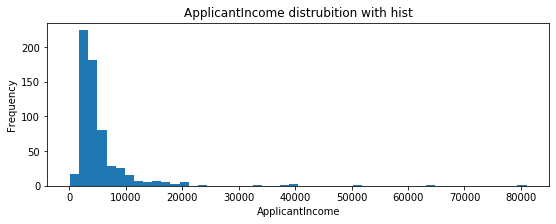

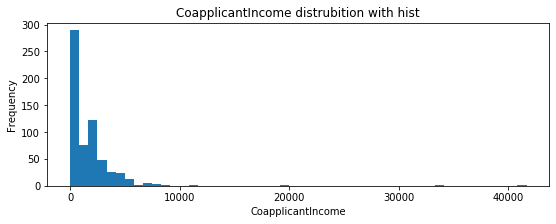

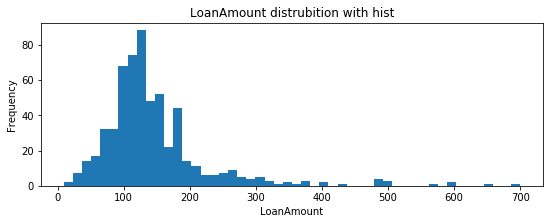

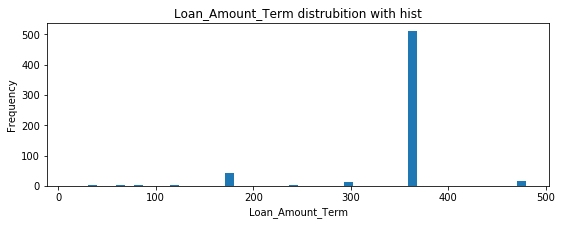

In [17]:
category2 = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
for c in category2:
    plot_hist(c)

## Basic Analysis

In [19]:
loan[["Loan_Status","Credit_History"]].groupby(["Loan_Status"], as_index = False).mean().sort_values(by="Credit_History", ascending = False)

,Loan_Status,Credit_History
1,Y,0.981818
0,N,0.541899


## Missing values

In [5]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Confirming the null value check above
loan.columns[loan.isnull().any()]

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

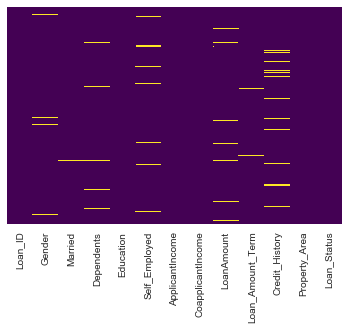

In [7]:
# determining how large the null values are
sns.set_style('whitegrid')
sns.heatmap(loan.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [45]:
# dropped any row with <= 10 missing values
# pd.set_option('display.max_rows', None)
# loan.apply(lambda x: x.count(), axis=1)

In [6]:
loan.drop(45, inplace=True, axis=0)

In [7]:
loan.drop(435, axis=0, inplace=True)

In [11]:
loan.isnull().sum().sum()

145

In [12]:
loan.isnull().any(axis=1).sum()

132

There are 145 missing values left after dropping two rows.
There also exists 132 rows with missing values, so we can't drop all missing values.
Time to inpute the missing values.
* Categorical will use mode
* Numerical will use mean or median

In [20]:
loan['CoapplicantIncome'].isnull().sum()

0

<BarContainer object of 612 artists>

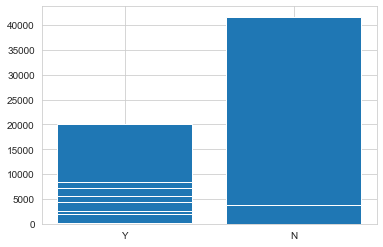

In [21]:
plt.bar(loan['Loan_Status'], loan['CoapplicantIncome'])

In [22]:
loan.loc[loan['CoapplicantIncome'] != 0, 'Loan_Status'].count()

341

In [25]:
loan[((loan['CoapplicantIncome'] != 0) & (loan['Loan_Status'] == 'Y'))].count()

Loan_ID              245
Gender               242
Married              244
Dependents           241
Education            245
Self_Employed        230
ApplicantIncome      245
CoapplicantIncome    245
LoanAmount           239
Loan_Amount_Term     239
Credit_History       222
Property_Area        245
Loan_Status          245
dtype: int64

In [26]:
loan[((loan['CoapplicantIncome'] != 0) & (loan['Loan_Status'] == 'N'))].count()

Loan_ID              96
Gender               92
Married              96
Dependents           93
Education            96
Self_Employed        92
ApplicantIncome      96
CoapplicantIncome    96
LoanAmount           92
Loan_Amount_Term     93
Credit_History       88
Property_Area        96
Loan_Status          96
dtype: int64

Inference:
* 245 were given loans because they had coapplicants. 
* 96 loan applications were declined when there were no coapplicants

Now, let's input missing values.

In [13]:
def errorReplacer(data):
    df = data
    x = pd.DataFrame(df.isnull().sum())
    x = x[x[0] > 0]

    for i in x.index:
        if df[i].dtypes == 'float':
            mean = df[i].mean()
            mean = int(mean)
            df[i].replace(np.nan, mean, inplace = True)
            if df[i].dtypes == 'int':
                df[i] = df[i].astype(int)
            elif df[i].dtypes == 'float':
                pass
        elif df[i].dtypes == 'object':
            mode = df[i].mode()
            df[i].replace(np.nan, mode, inplace = True)
    return df

In [14]:
loan = errorReplacer(loan)

In [17]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               2
Dependents           14
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
loan.drop(['Gender'], inplace=True, axis=1)

In [19]:
loan.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


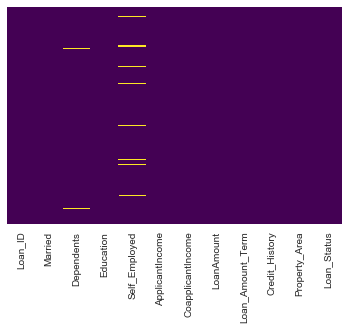

In [16]:
# determining how large the null values still remain
sns.set_style('whitegrid')
sns.heatmap(loan.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [52]:
loan.isnull().sum().sum()

48

So, after much efforts to fill missing values, I still have 48 missing values. That leaves me no option than to drop it. At least it's minimal compared to the initial number of missing values. You're welcome!

In [21]:
loan.dropna(inplace=True)

In [22]:
loan.isnull().sum().sum()

0

## Prediction Analysis sets in

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [25]:
# converting categorical variables into numeric
from sklearn.preprocessing import LabelEncoder
var_mod = ['Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    loan[i] = le.fit_transform(loan[i])

In [29]:
loan.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,0,5849,0.0,146.0,360.0,1.0,2,1
1,LP001003,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [18]:
# for the first prediction, let's use: Income fields, loan amount, loan duration and credit history fields to train our model.
array = loan.values
X = array[:,6:10]
y = array[:,11]
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [21]:
# Logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7807017543859649


In [22]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.6666666666666666


In [23]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7017543859649122


### Logistic regression performed the best with an accuracy score of 78%.
Let's see if we can get a better prediction by adding more variables to our model.

In [19]:
# for the **second** prediction, let's use: Dependents, Income fields, loan amount, loan duration and credit history fields to train our model.
x = loan[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]

y = loan['Loan_Status']

In [20]:
x = x
y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [29]:
# Logistic regression
model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7719298245614035


In [32]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7017543859649122


In [33]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7368421052631579


In [33]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.11)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7894736842105263


In [21]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.11)
ada_model.fit(x_train, y_train)
predictions = ada_model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.8070175438596491


Introducing **AdaBoost** gave an accuracy of 78.9% which is a better score than **Logistic regression**.

In the second model where dependents were added, AdaBoost gave an accuracy of 80.7% which turned out the best so far.

It's also worthy of mention that the second model gave a drop in accuracy of Logistic Regression. RandomForest improved from 68 to 69%. Where DT classifier showed no change in values.

In [22]:
y_pred = ada_model.predict(x_test)

In [23]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [26]:
pred

,Actual,Predicted
279,1,0
584,0,0
106,1,1
475,1,1
448,0,0
...,...,...
498,1,1
203,1,1
477,0,0
162,0,0


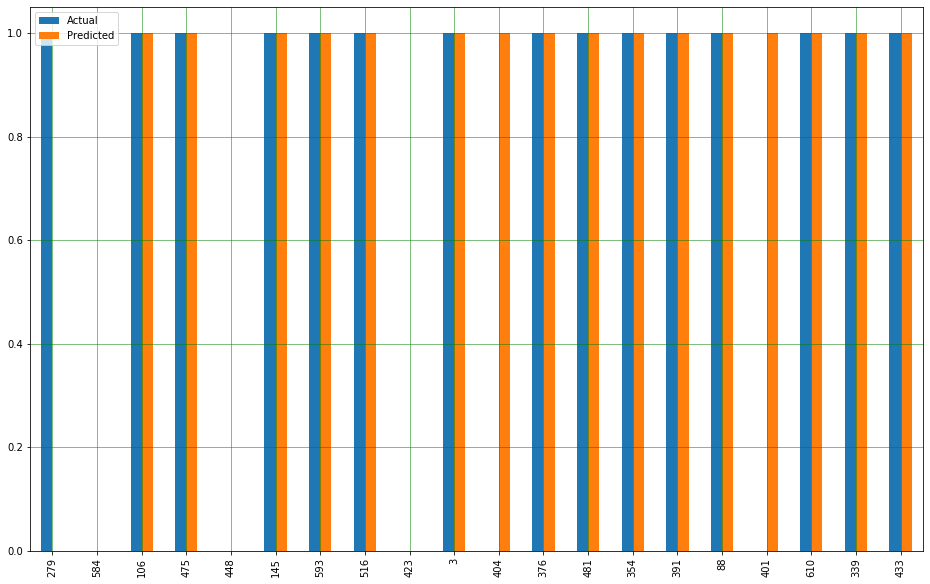

In [24]:
# We can also visualize comparison result as a bar graph
loan1 = pred.head(20)
loan1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

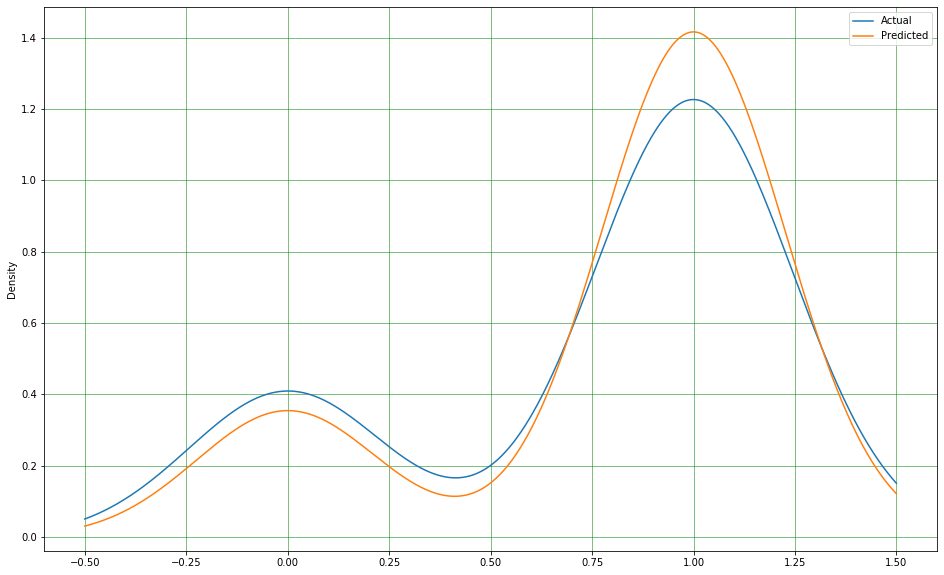

In [29]:
# We can also visualize comparison result as a bar graph
loan1 = pred.head(20)
loan1.plot(kind='kde',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

The prediction seems to fair well when we apply the second model.

According to the second model: 

x = Dependents, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term and Credit_History.

where y = Loan_Status.

Summary outputs would be in report, with AdaBoost having the highest. Although there is great room for improvement by tuning the hyperparameters.

In [31]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.19298245614035087
Mean Squared Error: 0.19298245614035087
Root Mean Squared Error: 0.4392976851069794


In [32]:
ada_model.feature_importances_ 

array([0.   , 0.205, 0.06 , 0.51 , 0.08 , 0.145])

In [34]:
model.feature_importances_

array([0.075, 0.695, 0.085, 0.145])